# **CS 1810 Homework 0**
---
To account for potential version issues, try the following in your terminal:

1. Create a new environment with `python3 -m venv venv`
2. Activate that environment with `source venv/bin/activate`
3. Make sure the interpreter in the top right corner of your VSCode (or whatever u use to run ur code is venv).
4. If you get a "install kernel" message, press it.
5. Run `pip install -r requirements.txt`
6. Run the remainder of this notebook.

Note that this is not necessary (especially for hw0) but can help prevent any issues due to package versions.

In [12]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn

## 1.6 Implement the solution for $\mathbf{w}$.

In [13]:
# Sets up X and y for a basis and arbitrary values for y
X = np.array([[1, 2], [1, 4]])
y = np.array([5, 6])

# In terms of D = {(x1, y1), (x2, y2)}, we have:
# X = [[1, x1], [1, x2]]
# y = [y1, y2]
# Therefore D = {(2, 5), (4, 6)}.

# Computing w using the analytical expression derived, we get:
# w = [(x2*y1 - x1*y2) / (x2 - x1), (-y1 + y2) / (x2 - x1)]
# Plugging in the values:
x1, y1 = 2, 5
x2, y2 = 4, 6
w_analytical = np.array([(x2 * y1 - x1 * y2) / (x2 - x1), (-y1 + y2) / (x2 - x1)])
print(w_analytical)

# Verifying by computing w using the matrix inverse
w = np.linalg.inv(X).dot(y)
print(w)

[4.  0.5]
[4.  0.5]


## 2.1 Plot $y = -3x^2 + 72x + 70$.

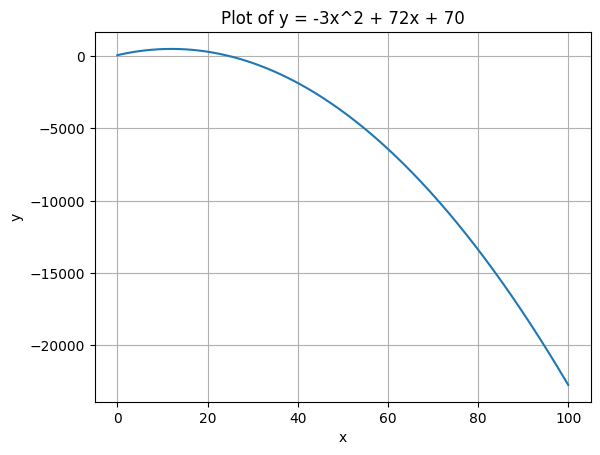

Vertex of the parabola is at x = 12.0, y = 502.0


In [14]:
# plotting
x = np.linspace(0, 100, 200)
y = -3 * x**2 + 72 * x + 70
plt.plot(x, y)
plt.title("Plot of y = -3x^2 + 72x + 70")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

# the max of y is at the vertex of the parabola
# this is given by x = -b/(2a) for a parabola ax^2 + bx + c
x_vertex = -72 / (2 * -3)
y_vertex = -3 * x_vertex**2 + 72 * x_vertex + 70
print(f"Vertex of the parabola is at x = {x_vertex}, y = {y_vertex}")

## 2.3 Plot $f(x_1, x_2)$.

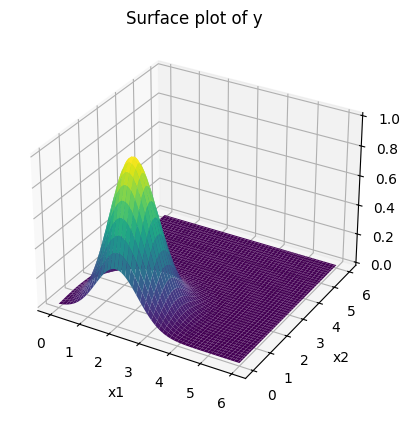

In [15]:
# y = f(x_1, x_2) = exp(-(x_1-2)^2-(x_2-1)^2)

x1 = np.linspace(0, 6, 100)
x2 = np.linspace(0, 6, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = np.exp(-((X1 - 2)**2 + (X2 - 1)**2))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Y, cmap='viridis')
ax.set_title("Surface plot of y")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.show()

#x_1 and x_2 that gives max height
x1_max, x2_max = 2, 1
# Graphically because that's where they are in the graph. They don't seem to ever rise again in the plotted region, so they are global maximums by this trend.

## 3.1(b) Draw from joint distribution of $(S, W)$ and generate bivariate histogram.

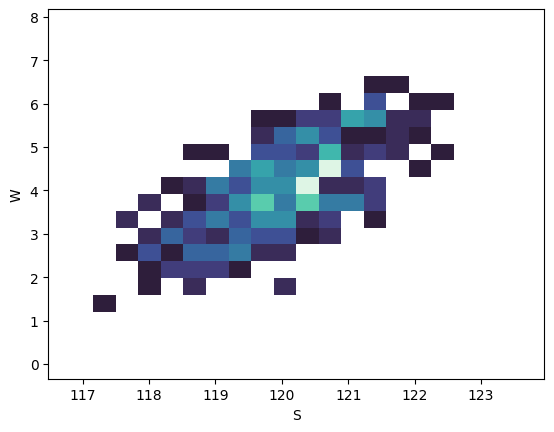

In [16]:
mu = np.array([120, 4])
Sigma = np.array([[1.5, 1], [1, 1.5]])

rv = mvn(mean=mu, cov=Sigma)
samples = rv.rvs(size=500) # shape (500, 2)
S_samples = samples[:, 0]
W_samples = samples[:, 1]

sns.histplot(x=S_samples, y=W_samples, bins=20, pthresh=0.1, cmap="mako")

plt.xlabel("S")
plt.ylabel("W")
plt.show()

# based on the graph below, seems like the center around (120,4) is the highest density region, so it's most likely to land around that point.
# This matches up with the mean of the distribution from the joint distribution given by the problem. Looks fine :))

## 3.2 Plot the joint PDFs at $S=118$ and $S=122$, varying $W$.

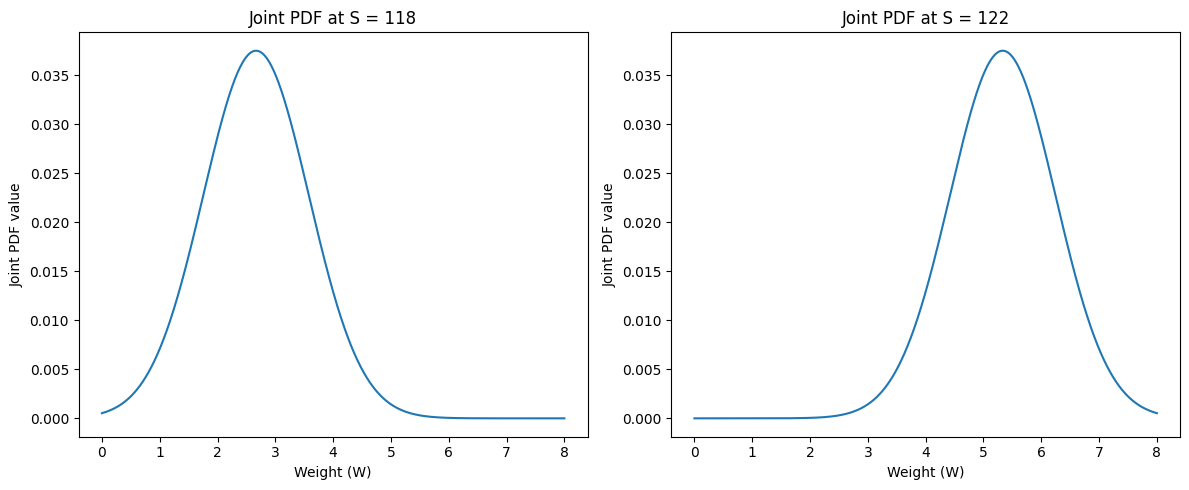

In [18]:
# joint PDFs at S = 118 and S = 122
weight_vals = np.linspace(0, 8, 1001)

pdf_118 = mvn.pdf(np.column_stack([np.full_like(weight_vals, 118), weight_vals]), mean=mu, cov=Sigma)
pdf_122 = mvn.pdf(np.column_stack([np.full_like(weight_vals, 122), weight_vals]), mean=mu, cov=Sigma)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(weight_vals, pdf_118)
plt.xlabel("Weight (W)")
plt.ylabel("Joint PDF value")
plt.title("Joint PDF at S = 118")

plt.subplot(1, 2, 2)
plt.plot(weight_vals, pdf_122)
plt.xlabel("Weight (W)")
plt.ylabel("Joint PDF value")
plt.title("Joint PDF at S = 122")
plt.tight_layout()
plt.show()


## 3.5(a) Function to simulate draws from $T^{*}$.

In [26]:
def sample_T_star():
        N = sum(np.random.poisson(3) for _ in range(24))
        T_star = sum(60 + 0.6 * np.random.normal(4, np.sqrt(1.5)) + 0.2 * np.random.normal(120, np.sqrt(1.5)) + np.random.normal(0, np.sqrt(5)) for _ in range(N))
        return T_star

## 3.5(b) Empirically estimate the mean and standard deviation of $T^{*}$ by generating $1000$ samples.

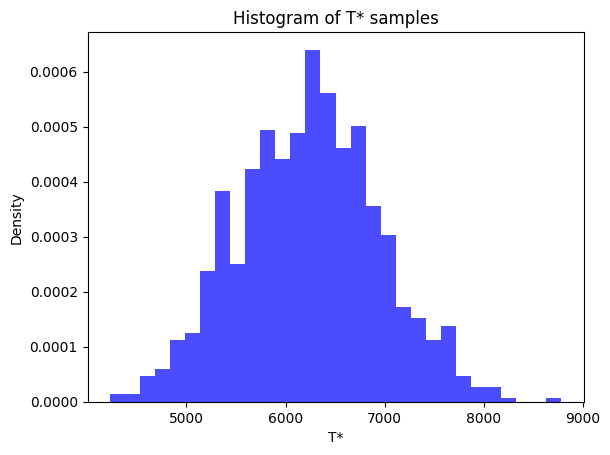

Mean of T*: 6234.342656390274, Variance of T*: 498792.52377625287, Standard Deviation of T*: 706.2524504568129


In [42]:
T_star_samples = [sample_T_star() for _ in range(1000)]
plt.hist(T_star_samples, bins=30, density=True, alpha=0.7, color='blue')
plt.xlabel("T*")
plt.ylabel("Density")
plt.title("Histogram of T* samples")
plt.show()

# the mean and variance of T*
mean_T_star = np.mean(T_star_samples)
var_T_star = np.var(T_star_samples)
std_T_star = np.std(T_star_samples)
print(f"Mean of T*: {mean_T_star}, Variance of T*: {var_T_star}, Standard Deviation of T*: {std_T_star}")

# 4.1: Examining the Data

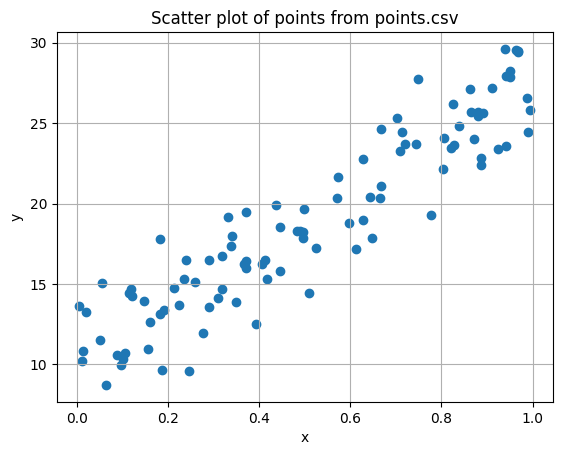

In [45]:
# Steve's solution... what's wrong...?

data = pd.read_csv("data/points.csv").values
x = data[:, 0]   # all rows, column 0
y = data[:, 1]   # all rows, column 1

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of points from points.csv")
plt.grid()
plt.show()

## 4.2: Adding the Intercept/Bias Term

In [46]:
# Steve's solution
intercept = np.ones(x.shape[0])
X = np.hstack([intercept, x]) # horizontally stack the ones and x coordinates next to each other

intercept = np.ones((x.shape[0], 1))
x_col = x.reshape(-1, 1)
X = np.hstack([intercept, x_col])


## 4.4: Implementing the LinearRegression Class

In [51]:
# Steve's solution
class LinearRegression:
    def __init__(self):
        self.w = None

    def fit(self, X, y):
        """
        Fit linear model to the data, estimating weights w.
        """
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y # corrected matrix multiplication
                                                  # also assigns to self.w
        return self.w

    def predict(self, X):                       # was missing the self parameter
        """
        Use fitted weights to predict target y given input features X.
        """
        return X @ self.w                       # use self.w to access the fitted weights


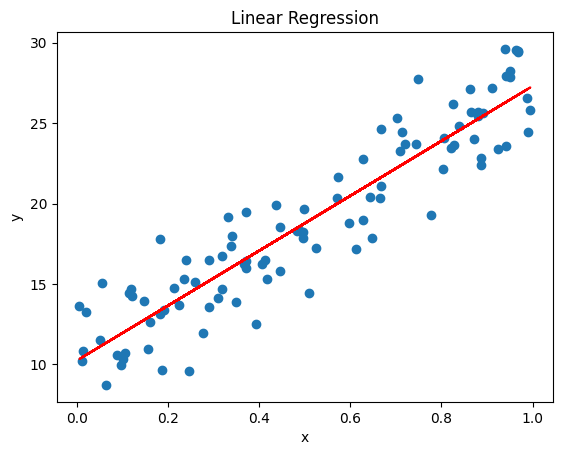

In [54]:
### DON'T MODIFY THIS CELL

# Fit the linear regression
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
# Plot the data and the regression line
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred, color='red')
plt.title("Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('img_output/hw0_p4_4.png')
plt.show()

## 4.5 MSE Computation

In [56]:
# Steve's solution
mse = 0
for i in range(len(y)):
    mse = mse + (y[i] - y_pred[i])**2
mse = mse / len(y)
print(mse)

4.439331220193988


In [59]:
# the same solution but in vectorized form under y and y_pred
def mean_squared_error(y, y_pred):
    n = y.shape[0]
    mse = np.sum((y - y_pred) ** 2) / n
    return mse

print(mean_squared_error(y, y_pred))
mse = np.mean((y - y_pred)**2)
print(mse)

4.439331220193986
4.439331220193986
